In [1]:
!{sys.executable} -m pip install -v "opencv-python==4.5.1.48"
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install deskew

'{sys.executable}' is not recognized as an internal or external command,
operable program or batch file.
'{sys.executable}' is not recognized as an internal or external command,
operable program or batch file.
'{sys.executable}' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from deskew import determine_skew

Wczytywanie obrazka i progowanie

1.5083798882681663


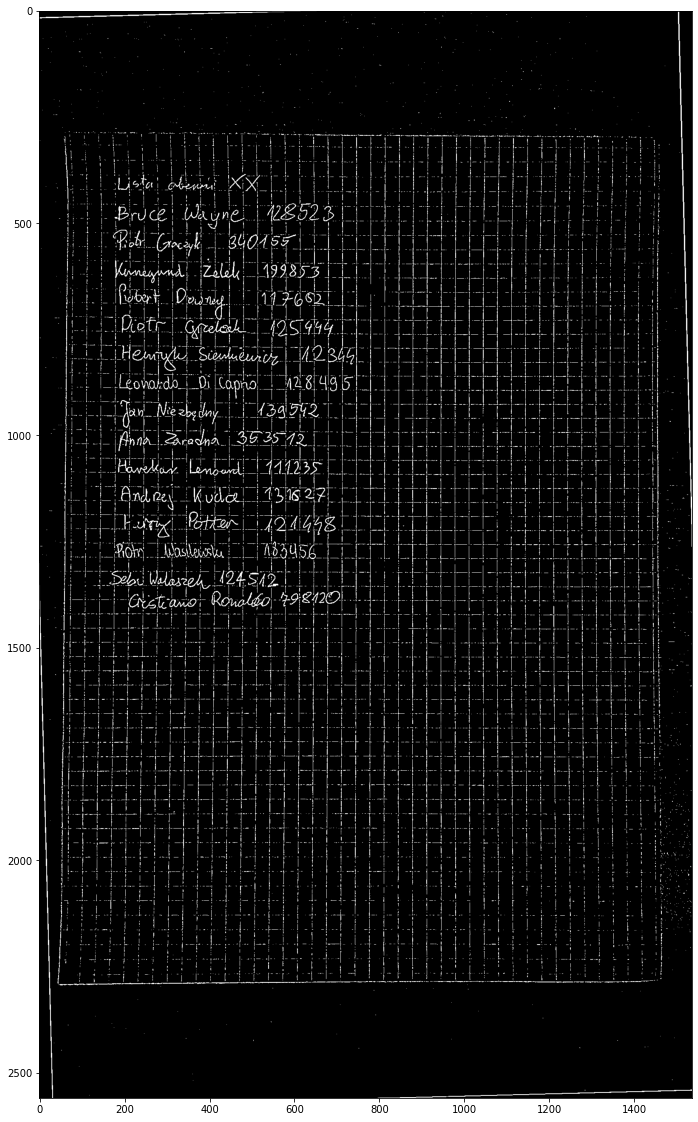

In [3]:
image = cv.imread('../data/test-1.png', cv.IMREAD_GRAYSCALE)

# thresh = cv.threshold(image, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)[1]
# _, thresh = cv.threshold(image, 140, 255, cv.THRESH_BINARY_INV)
thresh = cv.adaptiveThreshold(image, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 11, 9)
# bw = adaptiveThreshold(img, 255, ADAPTIVE_THRESH_MEAN_C, THRESH_BINARY, 15, -2)
plt.figure(figsize=(20, 20))
plt.imshow(thresh, cmap='gray')
plt.show()

Poziome linie

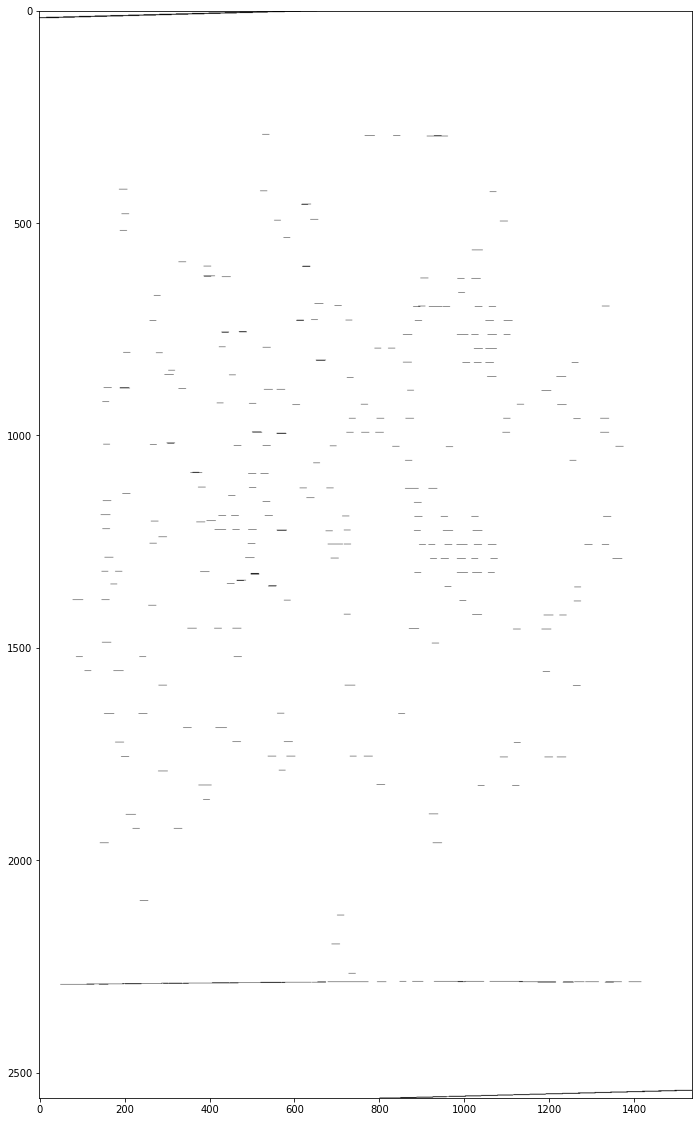

In [4]:
horizontal_structure = cv.getStructuringElement(cv.MORPH_RECT, (16, 1))
horizontal_mask = cv.morphologyEx(thresh, cv.MORPH_OPEN, horizontal_structure)

horizontal_mask = cv.bitwise_not(horizontal_mask)

plt.figure(figsize=(20, 20))
plt.imshow(horizontal_mask, cmap='gray')
plt.show()

Pionowe linie

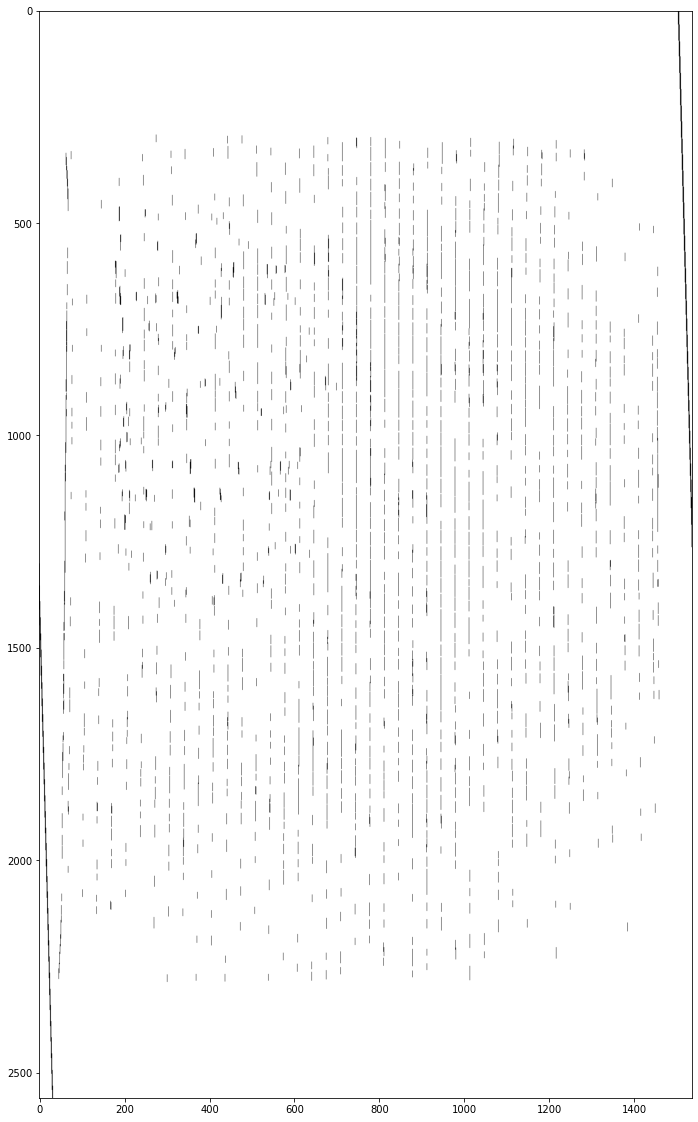

In [5]:
vertical_structure = cv.getStructuringElement(cv.MORPH_RECT, (1, 16))
vertical_mask = cv.morphologyEx(thresh, cv.MORPH_OPEN, vertical_structure)

# Contours are easier to detect on reverted mask
vertical_mask = cv.bitwise_not(vertical_mask)

plt.figure(figsize=(20, 20))
plt.imshow(vertical_mask, cmap='gray')
plt.show()

Usuwanie masek i naprawianie przycięć

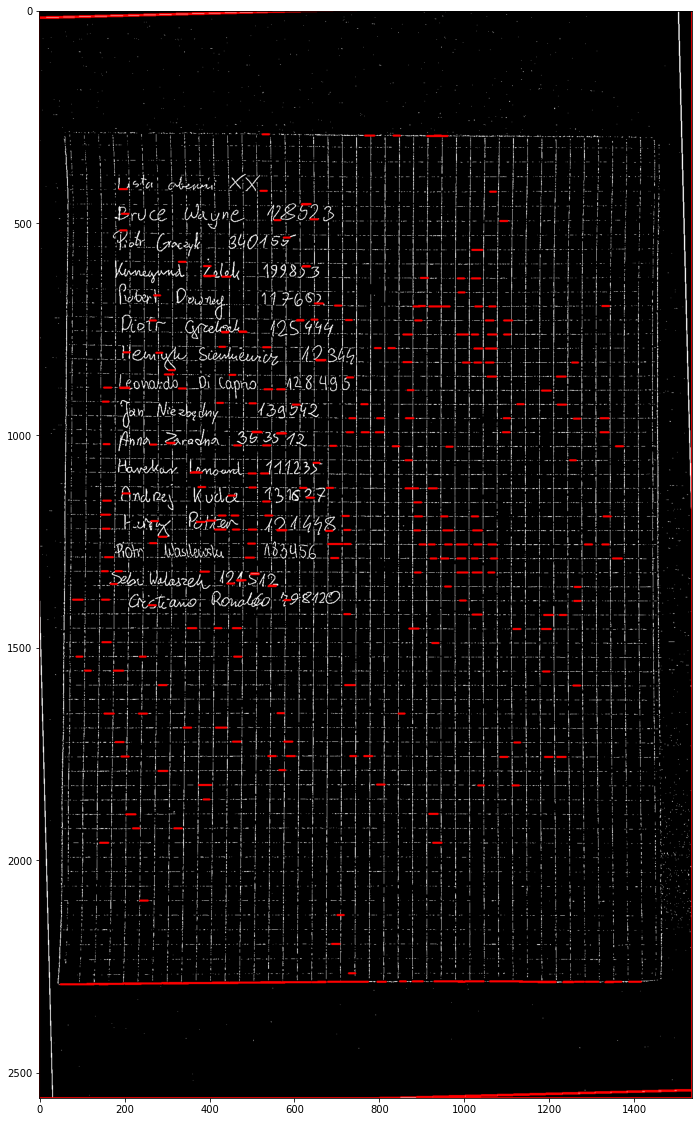

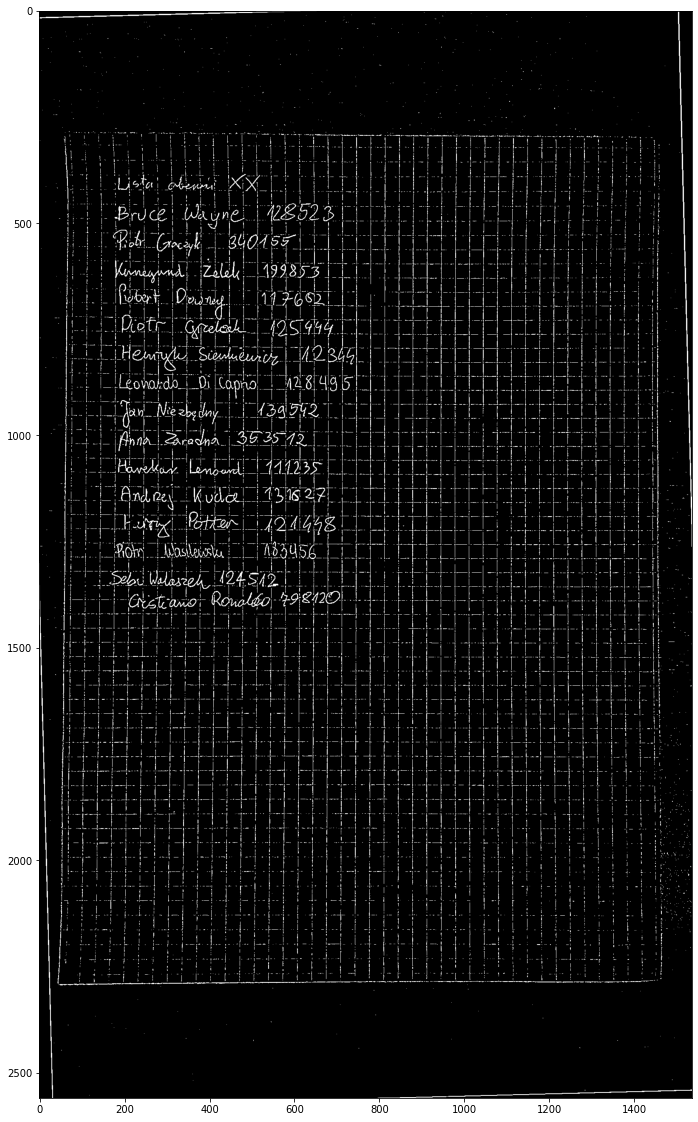

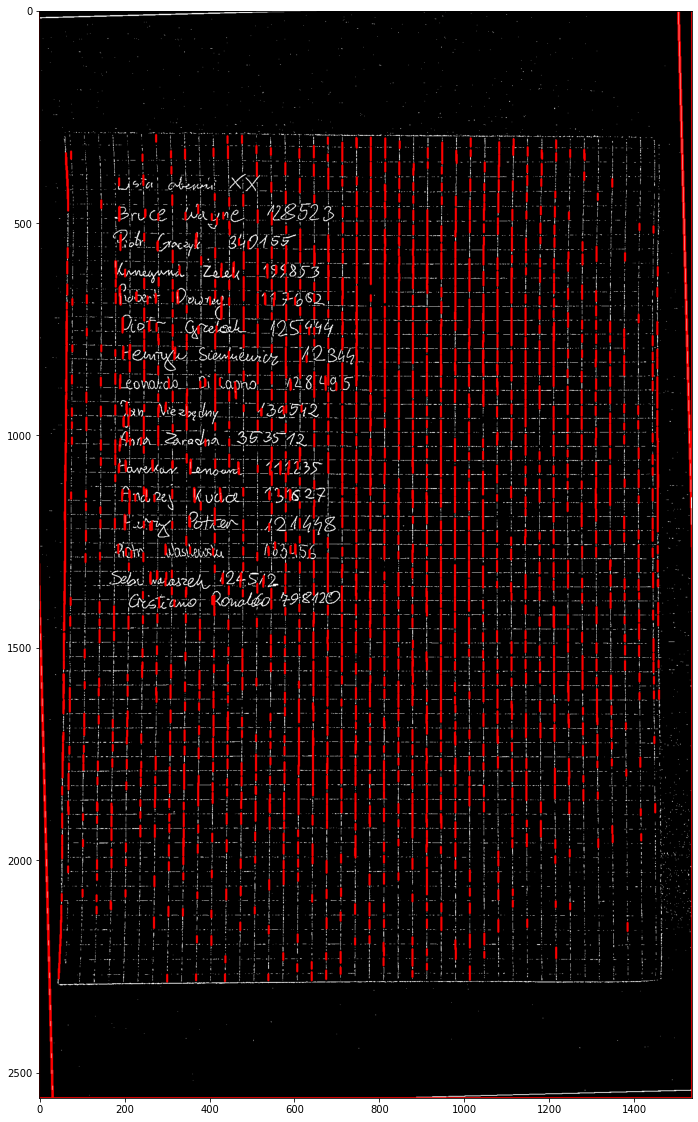

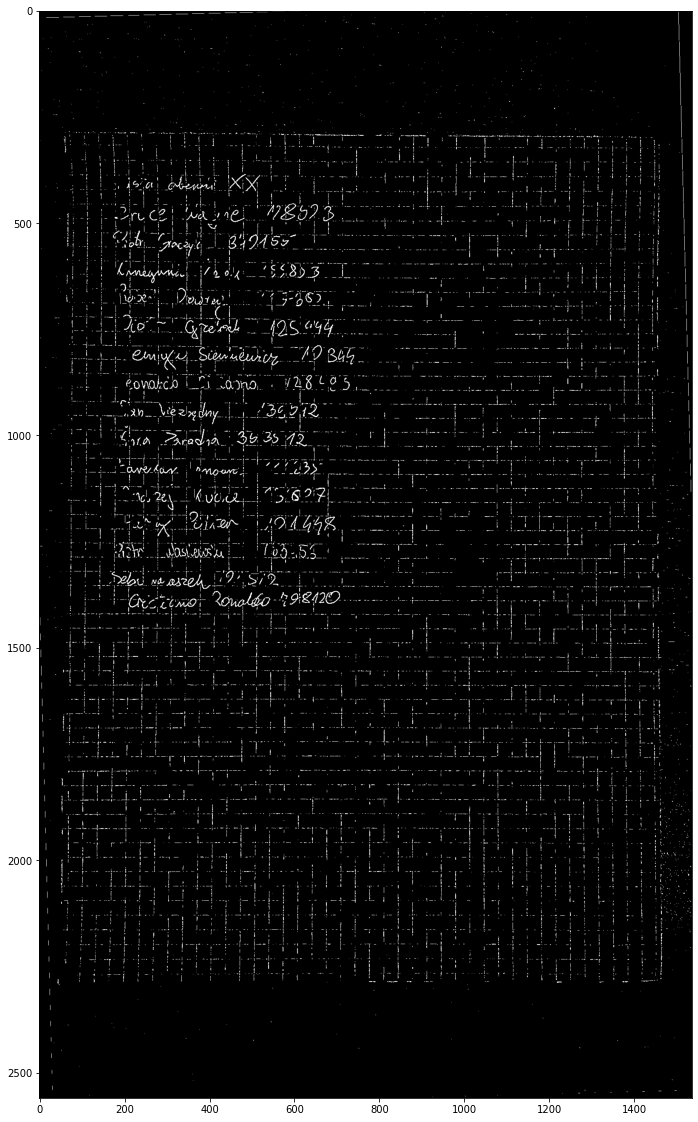

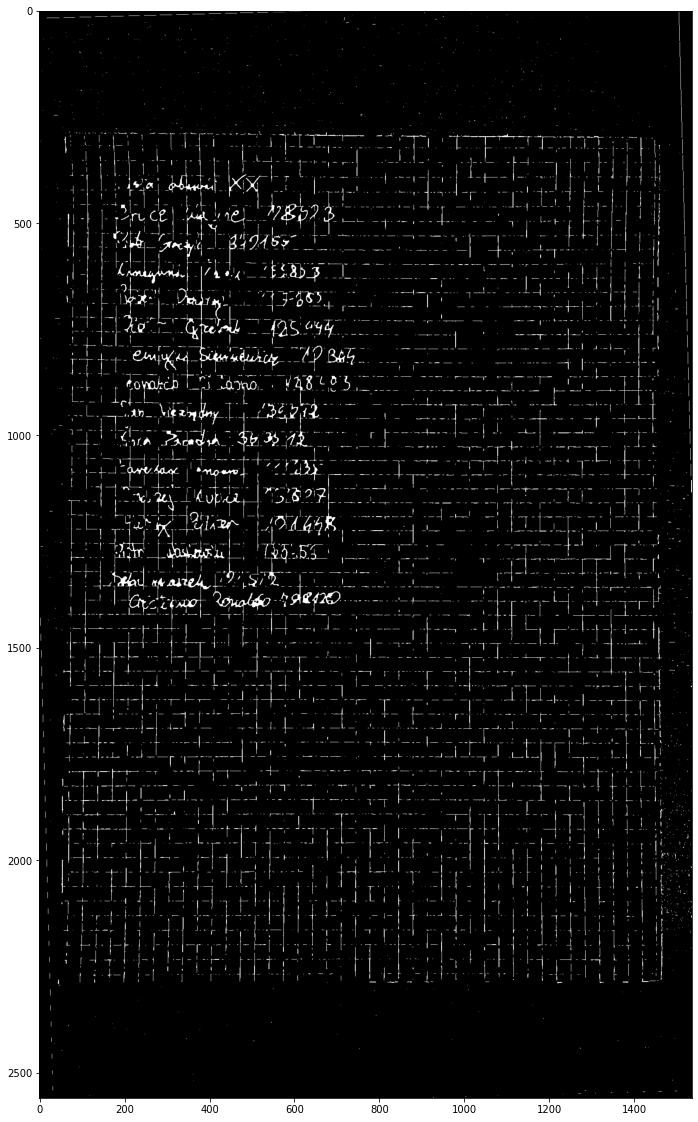

True

In [6]:
def remove_lines(img_: np.ndarray, mask_: np.ndarray, thickness_: int, color_=(0, 0, 0)):
    img_copy = img_.copy()

    contours_, _ = cv.findContours(mask_, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)

    for contour_ in contours_:
        cv.drawContours(img_copy, contour_, -1, color_, thickness_)
    return img_copy


# Remove horizontal
thresh_bgr = cv.cvtColor(thresh, cv.COLOR_GRAY2BGR)
result = remove_lines(thresh, horizontal_mask, 2)
thresh_bgr = remove_lines(thresh_bgr, horizontal_mask, 2, (255, 0, 0))

plt.figure(figsize=(20, 20))
plt.imshow(thresh_bgr, cmap='gray')
plt.show()

plt.figure(figsize=(20, 20))
plt.imshow(thresh, cmap='gray')
plt.show()

# Remove vertical
thresh_bgr = cv.cvtColor(thresh, cv.COLOR_GRAY2BGR)

result = remove_lines(result, vertical_mask, 2)
thresh_bgr = remove_lines(thresh_bgr, vertical_mask, 2, (255, 0, 0))

plt.figure(figsize=(20, 20))
plt.imshow(thresh_bgr)
plt.show()

plt.figure(figsize=(20, 20))
plt.imshow(result, cmap='gray')
plt.show()

# Repair image
repair_kernel = cv.getStructuringElement(cv.MORPH_RECT, (1, 6))
result = cv.morphologyEx(result, cv.MORPH_CLOSE, repair_kernel, iterations=1)

repair_kernel = cv.getStructuringElement(cv.MORPH_RECT, (4, 1))
result = cv.morphologyEx(result, cv.MORPH_CLOSE, repair_kernel, iterations=1)

# Alternative solution for removal of residual horizontal lines
# result_structure = cv.getStructuringElement(cv.MORPH_RECT, (2, 2))
# result = cv.morphologyEx(result, cv.MORPH_OPEN, result_structure)

plt.figure(figsize=(20, 20))
plt.imshow(result, cmap='gray')
plt.show()

cv.imwrite("dupa.png", result)